# Régression logistique - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données représente les chances de différents étudiants d'être admis à un programme universitaire en fonction de leurs résultats à deux examens

### Charger les données du fichier ex2data1.csv

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [82]:
data = pd.read_csv("dataset_train.csv")
data = data.drop(columns = ['First Name', 'Last Name', 'Birthday', 'Best Hand', 'Index'])
data = data.drop(columns = ['Arithmancy', 'Care of Magical Creatures']) #, 'Astronomy'])
# data = data.drop(columns = ['Divination', 'Muggle Studies', 'History of Magic'])
data = data.drop(columns = ['Flying', 'Potions', 'Charms', 'Transfiguration']) # ,'Transfiguration', , 'Ancient Runes'])


data = data.dropna() #aulieu de dropna il faut fire la tang
data
data.describe()

,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,40.838620,1.141000,-0.408386,3.166563,-222.251269,495.700089,2.996567
std,521.336774,5.227724,5.213368,4.167300,485.900919,106.652155,4.430561
min,-966.740546,-10.295663,-10.162119,-8.727000,-1043.961527,283.869609,-8.431117
25%,-487.566992,-4.294050,-5.268236,3.085000,-573.969159,396.263595,2.238739
50%,261.844384,3.486307,-2.618444,4.625000,-418.660994,463.918305,4.392980
75%,526.823552,5.428457,4.875670,5.730000,264.144523,598.104938,5.893868
max,1016.211940,10.296759,9.667405,10.032000,1092.388611,745.396220,11.889713


### Visualiser les données

Cette semaine nous vous fournissons la visualisation des données, mais normalement vous auriez à produire un graphe semblable avec matplotlib.

<img src="figure-1.png">

### Découpez vos données en une matrice X et un vecteur y et transformerz-les en array numpy

In [83]:
# X = np.column_stack((data['Herbology'] ,data['Defense Against the Dark Arts']))
X = data.copy()
X = X.drop(columns = ['Hogwarts House'])
y = np.column_stack(data['Hogwarts House'])
# X = np.c_[np.ones(X.shape[0]), X]

In [84]:
X

,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic
0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058
1,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170
2,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579
3,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637
5,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286
8,496.394945,-5.215891,-4.963949,5.855,-626.552041,567.842402,-6.198661
9,527.193585,7.922205,-5.271936,3.356,-398.101991,341.475606,4.978614
10,604.933962,5.484189,-6.049340,5.358,-530.795896,484.872671,5.699654
11,438.556950,5.320518,-4.385569,3.014,-518.560718,417.064093,4.801437
12,709.094614,1.705389,-7.090946,7.091,-328.712955,435.502183,6.300649


In [85]:
def normalise(x):
    return (x - np.mean(x)) / np.std(x)

X = normalise(X)
X = np.c_[np.ones(X.shape[0]), X]
X

array([[1.000000, -1.014543, 0.877603, ..., 1.017632, 0.345025, 0.504521],
       [1.000000, -1.137684, -1.364085, ..., -0.545763, -1.200039,
        0.250761],
       [1.000000, -0.780808, 1.259905, ..., 1.826443, 1.002553, 0.126218],
       ...,
       [1.000000, 0.965527, -0.831311, ..., -0.335375, 1.308577,
        -2.027761],
       [1.000000, 0.792173, 0.440474, ..., -1.254810, -1.052922,
        0.184366],
       [1.000000, 1.243556, 0.819021, ..., -0.024616, -1.462532,
        0.950984]])

In [86]:
X.shape

(1363, 8)

In [87]:
y

array([['Ravenclaw', 'Slytherin', 'Ravenclaw', ..., 'Gryffindor',
        'Hufflepuff', 'Hufflepuff']], dtype='<U10')

In [88]:
mask_Ravenclaw = y == "Ravenclaw"
mask_Gryffindor = y == "Gryffindor"
mask_Hufflepuff = y == "Hufflepuff"
mask_Slytherin = y == "Slytherin"

In [89]:
# mask_Ravenclaw

Vérifiez bien les dimensions de vos structures de données (X.shape)  
Rappelez-vous qu'il est judicieux de fixer les dimensions des vecteurs, par ex. (3,) avec la fonction reshape(3,1).
La matrice X doit-elle être de dimensions m x n ou bien m x (n+1) ? Quelle est la valeur de n?

### Initialisez theta en un vecteur de zéros


Combien de zéros vous faudra-t-il....?

In [90]:
theta = np.zeros(X.shape[1])






## Formulation de l'hypothèse

Revoyez l'équation de l'hypothèse de la régression logistique. Le produit de theta et de X est enveloppé dans une fonction g(z) qui correspond à la fonction sigmoïde. Nous allons commencer par coder cette fonction.

### Écrivez une fonction _sigmoid_ qui applique la sigmoïde à son argument et retourne le résultat. Si elle reçoit une matrice ou un vecteur en input, elle doit s'appliquer sur chaque élément individuellement et retourner une structure de mêmes dimensions

In [91]:
def sigmoid(z):
    #print (np.exp(-z))
    return (1 / (1 + np.exp(-z)))

Vérifiez votre fonction. Quelle valeur renvoie une sigmoïde si z=0? Si z est grand? Si z est petit?  
Il est possible que vous ayez un bug lorsque la fonction exponentielle reçoit des valeurs trop grandes. Dans ce cas vous pourrez éventuellement remplacer votre fonction sigmoïde par celle de scipy pour éviter des problèmes dans le reste de votre implémentation.

### Écrivez une fonction _predict_, qui correspond à l'hypohèse hθ(x), qui prend en paramètres X et theta, applique l'hypothèse du modèle avec la fonction sigmoide, et se débrouille pour que le résultat final soit un vecteur de 1 et de 0 correspondant aux catégories

In [92]:
def predict(X, theta):
    #print(X.shape, theta.shape)
    res = sigmoid(np.dot(X, theta.T))
    #print(res.shape)
    #print(res)
    return(res)

## Entraînement du modèle



### Définissez la fonction de coût de votre modèle

In [93]:
def cost(X, y, theta):
    return((-1 / X.shape[0]) * np.sum(y * np.log(predict(X, theta)) + (1 - y) * np.log(1 - predict(X, theta))))

#((-1 / X.shape[0])
#pensser a normaliser les donées en premier

### Calculez le coût de votre modèle non entraîné. Vous devriez obtenir une valeur d'environ 0.693

In [94]:
theta = np.zeros(X.shape[1], dtype=float)
print (cost(X, mask_Ravenclaw, theta))

0.6931471805599454


### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris, ainsi que l'évolution du coût

Noter que l'exercice original ne fait pas faire la descente du gradient pour entraîner le modèle, mais plutôt une fonction d'optimisation avancée (_fminunc_ en Matlab). Nous tenterons de faire quand même la descente du gradient. Les plus téméraires peuvent aussi trouver une fonction d'optimisation équivalente en Python et comparer les résultats.

In [95]:
# def fit(X, y, theta, alpha, num_iters):
#     # Initialiser certaines variables utiles
#     m = X.shape[0]
#     print (m)
#     J_history = []
#     for _ in range(num_iters):
#         theta = theta - (alpha / m) * (np.dot(predict(X, theta) - y, X))
#         #print(theta)
#         J_history.append(cost(X, y, theta))
#     return theta, J_history

def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variables utiles
    m = X.shape[0]
    J_history = []
    for _ in tqdm(range(num_iters)):
        theta = theta - (alpha / m) * (np.dot(predict(X, theta) - y, X))
        J_history.append(cost(X, y, theta))
    return theta, J_history

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!!

Voyez entre vous quelles valeurs semblent correctes pour alpha et num_iters

In [96]:
# theta = np.zeros(3, dtype=float)
# print (X.shape, theta.shape, y.shape)


# theta = np.zeros(X.shape[1], dtype=float)
# thetaR, J_historyR = fit(X, mask_Ravenclaw, theta, 0.001, 600)
# theta = np.zeros(X.shape[1], dtype=float)
# thetaG, J_historyG = fit(X, mask_Gryffindor, theta, 0.001, 1100)
# theta = np.zeros(X.shape[1], dtype=float)
# thetaH, J_historyH = fit(X, mask_Hufflepuff, theta, 0.001, 200)
# theta = np.zeros(X.shape[1], dtype=float)
# thetaS, J_historyS = fit(X, mask_Slytherin, theta, 0.001, 1200)

theta = np.zeros(X.shape[1], dtype=float)
thetaR, J_historyR = fit(X, mask_Ravenclaw, theta, 0.0001, 500)
theta = np.zeros(X.shape[1], dtype=float)
thetaG, J_historyG = fit(X, mask_Gryffindor, theta, 0.0001, 500)
theta = np.zeros(X.shape[1], dtype=float)
thetaH, J_historyH = fit(X, mask_Hufflepuff, theta, 0.0001, 500)
theta = np.zeros(X.shape[1], dtype=float)
thetaS, J_historyS = fit(X, mask_Slytherin, theta, 0.0001, 500)


# print (thetaR)

100%|██████████| 500/500 [01:15<00:00,  9.01it/s]


### Appelez la fonction _cost_ avec le nouveau theta après entraînement

Vous devriez obtenir une valeur autour de 0.203

In [97]:
# cost(X, mask_Ravenclaw, theta)
thetas = np.array([thetaG[X.shape[0]-1], thetaS[X.shape[0]-1], thetaH[X.shape[0]-1], thetaR[X.shape[0]-1]])
np.savetxt('thetas.csv', thetas, delimiter=',')

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

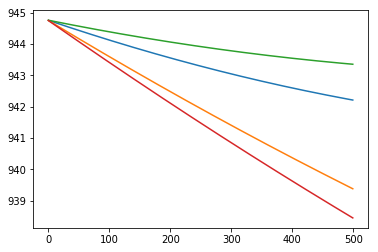

In [98]:
fig = plt.figure()
ax = plt.axes()
ax.plot(J_historyR)
ax.plot(J_historyG)
ax.plot(J_historyH)
ax.plot(J_historyS)

## Évaluation de votre modèle

Nous allons évaluer la performance du modèle de deux façons:

### Évaluez la probabilité qu'un étudiant ayant obtenu 45 au premier examen, et 85 au deuxième, soit admis

Vous devriez avoir une probabilité d'admission de 0.776

### Évaluer l'exactitude (accuracy) des prédictions faites sur les données d'entraînement

Utilisez votre fonction _predict_ sur les données d'entraînement (X) et récupérez les prédictions dans un vecteur p

In [ ]:
test = pd.read_csv("dataset_test.csv")

solution = pd.read_csv("Correction/dataset_truth.csv")

# solution = np.column_stack((solution['Herbology'] ,solution['Defense Against the Dark Arts']))

test = test.drop(columns = ['Hogwarts House'])

test = test.drop(columns = ['First Name', 'Last Name', 'Birthday', 'Best Hand', 'Index'])
test = test.drop(columns = ['Arithmancy', 'Care of Magical Creatures', 'Astronomy'])

test.describe()

# toto = np.column_stack((test['Herbology'] ,test['Defense Against the Dark Arts']))
# toto = np.column_stack((toto ,test['Ancient Runes']))


# test = test.dropna() #aulieu de dropna il faut fire la tang

# a = 0
# while a < toto.shape[0]:
#     if np.isnan(toto[a][0]):
# #         print (test[a][0])
#         toto[a][0] = 5.055295
# #         print (test[a][0])
#     if np.isnan(toto[a][1]):
# #         print (test[a][1])
#         toto[a][1] = 5.118762
# #         print (test[a][1])
#     if np.isnan(toto[a][1]):
# #         print (test[a][1])
#         toto[a][2] = 101.657418
#     a += 1

    
# a = 0
# b = 0
# while a < test.shape[0]:
#     b = 0
#     while b < 11:
#         if np.isnan(test[a][b]):
#             test[a][b] = 0
#             b += 1
#     a += 1
    
# toto = np.c_[np.ones(toto.shape[0]), toto]

test = normalise(test)
test = np.c_[np.ones(test.shape[0]), test]

# toto
# solution

In [ ]:
R = predict(test, thetaR)
G = predict(test, thetaG)
S = predict(test, thetaS)
H = predict(test, thetaH)

print ('Ravenclaw =', R, '\nGryffindor = ', G, '\nSlytherin =' , S, '\nHufflepuff =' ,H)
print (solution)

In [ ]:
result = np.array([["Index", "Hogwarts House"]])
for i in range(len(R)):
    is_r = True if R[i] >= G[i] and R[i] >= S[i] and R[i] >= H[i] else False
    is_g = True if G[i] >= R[i] and G[i] >= S[i] and G[i] >= H[i] else False
    is_s = True if S[i] >= R[i] and S[i] >= G[i] and S[i] >= H[i] else False
    is_h = True if H[i] >= R[i] and H[i] >= G[i] and H[i] >= S[i] else False

    if is_r :
        house = "Ravenclaw"
    elif is_g :
        house = "Gryffindor"
    elif is_s :
        house = "Slytherin"
    else :
        house = "Hufflepuff"
    result = np.append (result, [[ids[i], house]], axis = 0)

np.savetxt('houses.csv', result, delimiter=',', fmt="%s")

Calculez le pourcentage des éléments de p qui correspondent à ceux de y. Ça vous donne le score d'exactitude

In [ ]:
precision = 0
total = 0
for tmp, ground_truth in zip(X, y):
    result = round(predict(tmp, theta))
    if result == ground_truth:
        precision += 1
    total += 1
print((precision / total) * 100)

Vous devriez avoir un score d'environ 89.0 %

### Quelle est la précision, le recall et le F1-score de votre modele ? (écrivez trois fonctions pour obtenir chacunes de ces métriques)

In [ ]:
def precision(X, y, theta):
    true_pos = 0
    false_pos = 0
    for tmp, ground_truth in zip(X, y):
        result = round(predict(tmp, theta))
        if result == 1 and ground_truth == 1:
            true_pos += 1
        elif result == 1 and ground_truth == 0:
            false_pos += 1
    return((true_pos / (true_pos + false_pos + 0.001)) * 100)
    
def recall(X, y, theta):
    true_pos = 0
    false_neg = 0
    for tmp, ground_truth in zip(X, y):
        result = round(predict(tmp, theta))
        if result == 1 and ground_truth == 1:
            true_pos += 1
        elif result == 0 and ground_truth == 1:
            false_neg += 1
    return((true_pos / (true_pos + false_neg + 0.001)) * 100)

def f1_score(X, y, theta):
    prec = precision(X, y, theta)
    rec = recall(X, y, theta)
    return (2 * ((prec * rec) / (prec + rec + 0.001)))

print("precision : {}".format(precision(X, y, theta)))
print("recall : {}".format(recall(X, y, theta)))
print("f1_score : {}".format(f1_score(X, y, theta)))

### A l'aide de l'hyperparameter tuning (random search), trouvez les alpha et lambda qui permettent de maximiser le F1-score. Vous devrez entrainer plusieurs fois votre modele à l'aide de la fonction fit pour trouver ces parametres.

In [51]:
alpha_range = [0.001, 0.002]
def random_search(occurences=50,
                  iters=1000,
                  alpha_range = [0.001, 0.002]
                  ):
    a_history = []
    f1_history = []
    for _ in range(occurences):
        tmp_alpha = np.random.uniform(alpha_range[0],alpha_range[1])
        theta = np.zeros(X.shape[1])
        theta, J_history = fit(X, y, theta, tmp_alpha, iters)
        a_history.append(tmp_alpha)
        f1_history.append(f1_score(X, y, theta))
    return (a_history, f1_history)
a_history, f1_history = random_search(alpha_range=alpha_range)

  0%|          | 0/1000 [00:00<?, ?it/s]


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [ ]:
sorted(f1_history, reverse=True)

In [ ]:
max_10_index = list(np.argsort(f1_history[1])[-10:])
min_a = 1.0
max_a = 0.0
for elem in max_10_index:
    a = a_history[elem]
    if a > max_a:
        max_a = a
    if a < min_a:
        min_a = a
alpha_range = [min_a, max_a]
alpha_range

## BONUS: Visualisez la frontière de décision (decision boundary) sur le graphe

Pour ceux qui veulent découvrir Matplotlib, il faut ici afficher les données en deux nuages de points distincts (pour les deux classes) sur le même graphe, et aussi trouver une façon de tracer la fonction qui définit la frontière de décision. Amusez-vous bien, et surtout aidez-vous! Voici un exemple de ce que ça devrait donner:  
<img src="figure-2.png">

In [ ]:
def get_intercept_slope(theta):
    x_1 = 0
    intercept = 0
    pred = 0
    while pred < 0.5:
        p = [1, x_1, intercept]
        intercept += 0.1
        pred = predict(p, theta)
    x_1 = 30
    x_2 = 40
    y_1 = 0
    y_2 = 0
    pred = 0
    while pred < 0.5:
        p = [1, x_1, y_1]
        y_1 += 0.1
        pred = predict(p, theta)
    pred = 0
    while pred < 0.5:
        p = [1, x_2, y_2]
        y_2 += 0.1
        pred = predict(p, theta)
    slop = (x_1 - x_2) / (y_1 - y_2)
    return (intercept, slop)
intercept, slop = get_intercept_slope(theta)

def visualize(x, y, color, theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(x, y, c=color)
    plt.plot(x, x * slop + intercept, 'b', linewidth=0.2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()
visualize(X[:,1], X[:,2], data.admission, theta)